In [13]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import teams
from nba_api.stats.static import players
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

## Load Data 

In order to make our API request, we need player ID and team ID number to retrieve shot stats. Luckily, we can take advantage of another Github [repo](https://github.com/bttmly/nba). We can use the two JSON files via Python to load them into arrays of dictionary objects. 

In [5]:
# Load teams file
teams = json.loads(requests.get("https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json").text)

# Get team ID based on team name
def get_team_id(team):
  for team in teams:
    if team['teamName'] == team:
      return team['teamId']
  return -1

## Helper Functions

Now that we have all the player and team data loaded, we can create functions that take an input of a team name and a player’s name, and return their respective ID numbers. In both cases, if a player or team name cannot be found, the functions return -1:

In [8]:
# Load players file
players = json.loads(requests.get("https://raw.githubusercontent.com/bttmly/nba/master/data/players.json").text)


# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

In [27]:
# Get the team ID number for the Knicks
get_team_id('Golden State Warriors')


# Get the player ID number for Klay Thompson
get_player_id('Kevin', 'Durant')


201142

# Retrieve the JSON: Using the nba_api package

First we set the URL https://stats.nba.com/stats/shotchartdetail as our base URL. shotchartdetail is the endpoint where we can retrieve shot location data.

Next we set the request headers via the headers dictionary. Without the correct settings, stats.nba.com will forcibly close the connection. 


We then need to set the URL parameters via the parameters dictonary. There are more parameter options than the ones listed here, but these are the ones that are specified as being ‘required’.


The nba_api package provides additional functions to look up a player_id (please refer to their documentation on Github). Another way to find a player_id is to visit the relevant player’s page on stats.nba.com and check the URL.

The documentation for the NBA API (Credit to Swar Patel) is linked [here](https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md)— which outlines the endpoints with data that is available for querying using the API. This tutorial only covers 1 specific endpoint (/ShotChartDetail) within the API.

# Team Comparison 

In [ ]:
from nba_api.stats.endpoints import leaguedashteamstats
import requests
import json
import pandas as pd

response = leaguedashteamstats.LeagueDashTeamStats(
    team_id_nullable='0',
    league_id_nullable='00',
    season= '2021-22',
    season_type_all_star='Regular Season',
    headers={'Accept': 'application/json, text/plain, */*',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'en-US,en;q=0.9',
'Connection': 'keep-alive',
'Host': 'stats.nba.com',
'Origin': 'https://www.nba.com',
'Referer': 'https://www.nba.com/',
'sec-ch-ua': '"Google Chrome";v="87", "\"Not;A\\Brand";v="99", "Chromium";v="87"',
'sec-ch-ua-mobile': '?1',
'Sec-Fetch-Dest': 'empty',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Site': 'same-site',
'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36',
'x-nba-stats-origin': 'stats',
'x-nba-stats-token': 'true'})


df = response.get_data_frames()[0]
df

In [ ]:
df.to_csv("./Files/teams_2021-22.csv")

# Get Players and Teams

In [1]:
#Get Players
player_dict = players.get_players()

#Get Teams
teams = teams.get_teams()


In [42]:
player_dict

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [43]:
teams

[{'teamId': 1610612737,
  'abbreviation': 'ATL',
  'teamName': 'Atlanta Hawks',
  'simpleName': 'Hawks',
  'location': 'Atlanta'},
 {'teamId': 1610612738,
  'abbreviation': 'BOS',
  'teamName': 'Boston Celtics',
  'simpleName': 'Celtics',
  'location': 'Boston'},
 {'teamId': 1610612751,
  'abbreviation': 'BKN',
  'teamName': 'Brooklyn Nets',
  'simpleName': 'Nets',
  'location': 'Brooklyn'},
 {'teamId': 1610612766,
  'abbreviation': 'CHA',
  'teamName': 'Charlotte Hornets',
  'simpleName': 'Hornets',
  'location': 'Charlotte'},
 {'teamId': 1610612741,
  'abbreviation': 'CHI',
  'teamName': 'Chicago Bulls',
  'simpleName': 'Bulls',
  'location': 'Chicago'},
 {'teamId': 1610612739,
  'abbreviation': 'CLE',
  'teamName': 'Cleveland Cavaliers',
  'simpleName': 'Cavaliers',
  'location': 'Cleveland'},
 {'teamId': 1610612742,
  'abbreviation': 'DAL',
  'teamName': 'Dallas Mavericks',
  'simpleName': 'Mavericks',
  'location': 'Dallas'},
 {'teamId': 1610612743,
  'abbreviation': 'DEN',
  'tea

# Gathering the Data

The first step is to make use of the NBA API to gather the relevant data you want to use. This can be done through the NBA API itself, by simply entering in the “player_id” and “team_id” for whatever player you are looking for.

We used the get_players() and get_teams() functions to access player id and team id, respectively.

In [21]:
#Fetch Curry Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201939, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df = shot_detail.get_data_frames()[0]

In [19]:
#Fetch Klay Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 202691, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_klay = shot_detail.get_data_frames()[0]


In [22]:
#Fetch Derrick Rose Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201565, 
              team_id= 1610612752, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_drose_ny = shot_detail.get_data_frames()[0]


In [25]:
#Fetch MVP Derrick Rose Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201565, 
              team_id= 1610612741, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_drose_bulls = shot_detail.get_data_frames()[0]

In [33]:
#Fetch GSW Durant 

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201142, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_durant_gsw = shot_detail.get_data_frames()[0]

In [34]:
#Fetch OKC Durant 

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201142, 
              team_id= 1610612760, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_durant_okc = shot_detail.get_data_frames()[0]

In [22]:
#Stephen Curry Stats
shot_df_curry = shot_df
shot_df_curry.to_csv("./Files/curry_historical_shots.csv")

In [20]:
#Klay Thompson Stats
shot_df_klay.to_csv("./Files/klay_historical_shots.csv")

In [24]:
#D Rose Knicks
shot_df_drose.to_csv("./Files/ny_drose_historical_shots.csv")

In [26]:
#MVP D Rose - Chicago Bulls

shot_df_drose_bulls.to_csv("./Files//bulls_drose_historical_shots.csv")

In [35]:
shot_df_durant_okc.to_csv("./Files/okc_durant_historical_shots.csv")

In [40]:
shot_df_durant_gsw.to_csv("./Files/gsw_durant_historical_shots.csv")

In [5]:
#Fetch Curry Playoffs

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201939, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Playoffs')
shot_df_curry_playoffs = shot_detail.get_data_frames()[0]

In [9]:
# shot_df_curry_playoffs.to_csv("./Files/gsw_curry_playoffs_shots.csv")


In [11]:
#Fetch Klay Playoffs
shot_detail = shotchartdetail.ShotChartDetail(player_id= 202691, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Playoffs')
shot_df_klay_playoffs = shot_detail.get_data_frames()[0]
shot_df_klay_playoffs.to_csv("./Files/gsw_klay_playoffs_shots.csv")

# Create a basketball court with Matplotlib

To create our shot chart, we will use a plot called hexbin which is built-in with matplotlib. This function will bin all the shots based on location into hexagonally-shaped bins.  and then color them based on the number of items in each bin.

The basketball court dimensions can be found [here](http://sportsknowhow.com/basketball/dimensions/nba-basketball-court-dimensions.html). Credit goes to [Savvas Tjortjoglou](http://savvastjortjoglou.com/nba-shot-sharts.html) for inspirations for the creation of this basketball court.


In [14]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

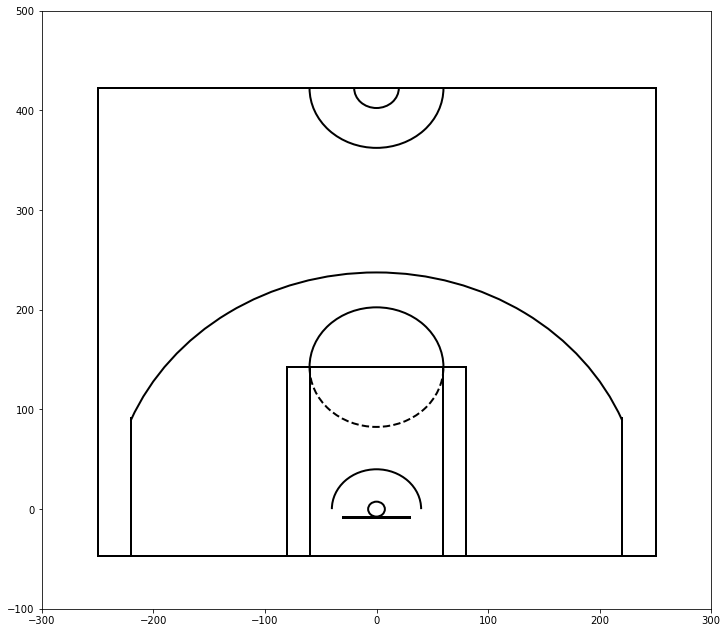

In [15]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Generate Shot Charts

In [17]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df_curry.LOC_X, shot_df_curry.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

NameError: name 'shot_df_curry' is not defined

<Figure size 864x792 with 0 Axes>